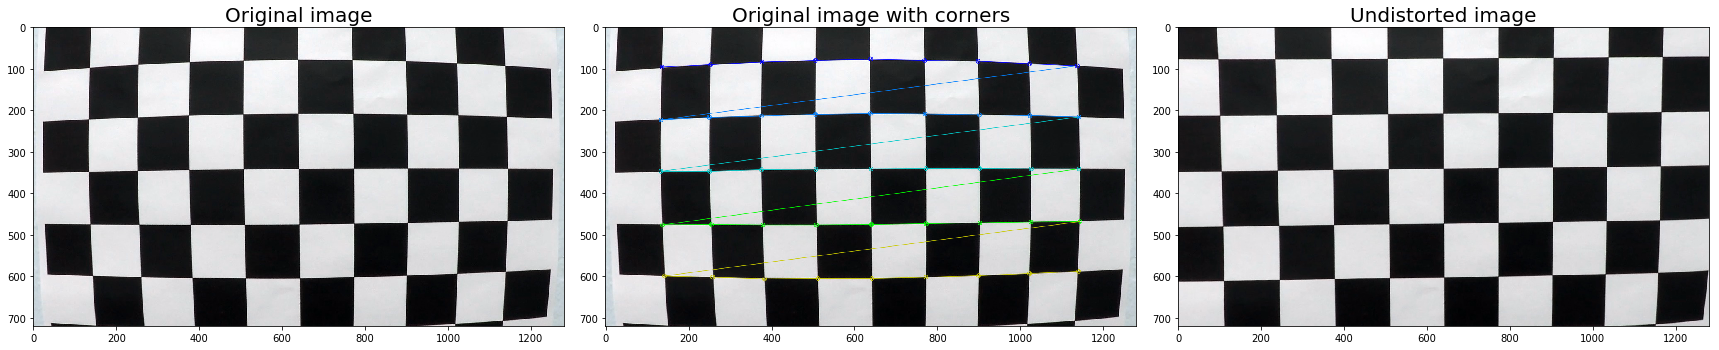

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def undistortion(img, objpoints, imgpoints):
    ## get calibration matrix and coefficients
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], None, None)
    ## undistort with calibration matrix and coefficients
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

DataDir = 'camera_cal'
## Make a list of calibration images
fname = '%s/calibration1.jpg' % DataDir
img = cv2.imread(fname)

nx = 9 #the number of inside corners in x
ny = 5 #the number of inside corners in y, there are only 5 corners not 6 in calibration1.jpg

objpoints = []
imgpoints = []
## prepare object points
objp = np.zeros((nx * ny, 3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)

## Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
if ret == True: # found corners
    ## collect object points and image points, draw corners
    imgpoints.append(corners)
    objpoints.append(objp)
    img_tmp = img.copy()
    ## draw the corners, this is a checking step
    cv2.drawChessboardCorners(img_tmp, (nx, ny), corners, ret)
    ## undistort this image
    undistorted = undistortion(img, objpoints, imgpoints)
    ## plotting
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
    f.tight_layout()
    ax1.set_title('Original image', fontsize=20)
    ax1.imshow(img)
    ax2.set_title('Original image with corners', fontsize= 20)
    ax2.imshow(img_tmp)
    ax3.set_title('Undistorted image', fontsize=20)
    ax3.imshow(undistorted)
    plt.show()